In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

Text(0.5, 1.0, 'Scattered data')

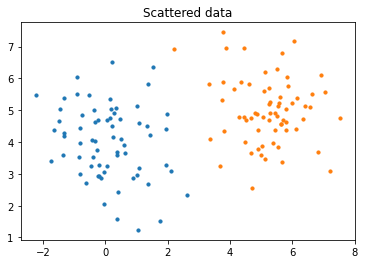

In [ ]:
centers = [(0, 4), (5, 5) , (8,2)]
cluster_std = [1.2, 1, 1.1]

X, y= datasets.make_blobs(n_samples=200, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)

plt.scatter(X[y == 0, 0], X[y == 0, 1], s=10, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=10, label="Cluster2")
#plt.scatter(X[y == 2, 0], X[y == 2, 1], s=10, label="Cluster3")
plt.title("Scattered data")

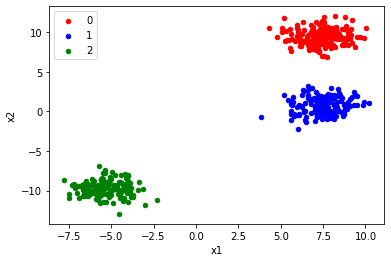

In [ ]:
X, y = datasets.make_circles(n_samples=1000, factor=0.5, random_state=3, noise=0.05)
X, y = datasets.make_moons(n_samples=500, noise=0.05)
X, y = datasets.make_blobs(n_samples=500, random_state=8)

df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
for key, group in df.groupby('label'):
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])

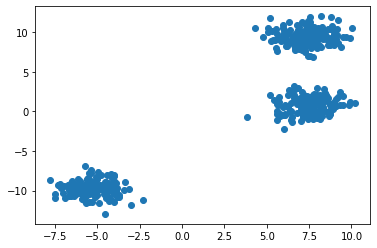

In [ ]:
plt.scatter(X[:,0],X[:,1])

In [ ]:
def check_core_point(eps,minPts, df, index):
    #get points from given index
    x, y = df.iloc[index]['X']  ,  df.iloc[index]['Y']

    #check available points within radius
    temp =  df[((np.abs(x - df['X']) <= eps) & (np.abs(y - df['Y']) <= eps)) & (df.index != index)]

    #check how many points are present within radius
    if len(temp) >= minPts:
        #return format (dataframe, is_core, is_border, is_noise)
        return (temp.index , True, False, False)

    elif (len(temp) < minPts) and len(temp) > 0:
        #return format (dataframe, is_core, is_border, is_noise)
        return (temp.index , False, True, False)

    elif len(temp) == 0:
        #return format (dataframe, is_core, is_border, is_noise)
        return (temp.index , False, False, True)

In [ ]:
def cluster_with_stack(eps, minPts, df):

    #initiating cluster number
    C = 1
    #initiating stacks to maintain
    current_stack = set()
    unvisited = list(df.index)
    clusters = []


    while (len(unvisited) != 0): #run until all points have been visited

        #identifier for first point of a cluster
        first_point = True

        #choose a random unvisited point
        current_stack.add(random.choice(unvisited))

        while len(current_stack) != 0: #run until a cluster is complete

            #pop current point from stack
            curr_idx = current_stack.pop()

            #check if point is core, neighbour or border
            neigh_indexes, iscore, isborder, isnoise = check_core_point(eps, minPts, df, curr_idx)

            #dealing with an edge case
            if (isborder & first_point):
                #for first border point, we label it aand its neighbours as noise
                clusters.append((curr_idx, 0))
                clusters.extend(list(zip(neigh_indexes,[0 for _ in range(len(neigh_indexes))])))

                #label as visited
                unvisited.remove(curr_idx)
                unvisited = [e for e in unvisited if e not in neigh_indexes]

                continue

            unvisited.remove(curr_idx) #remove point from unvisited list


            neigh_indexes = set(neigh_indexes) & set(unvisited) #look at only unvisited points

            if iscore: #if current point is a core
                first_point = False

                clusters.append((curr_idx,C)) #assign to a cluster
                current_stack.update(neigh_indexes) #add neighbours to a stack

            elif isborder: #if current point is a border point
                clusters.append((curr_idx,C))

                continue

            elif isnoise: #if current point is noise
                clusters.append((curr_idx, 0))

                continue

        if not first_point:
            #increment cluster number
            C+=1

    return clusters

In [ ]:
#radius of the circle defined as 0.6
eps = 0.6
#minimum neighbouring points set to 3
minPts = 4

In [ ]:
#radius of the circle defined as 0.6
eps = 0.7
#minimum neighbouring points set to 3
minPts = 20
data = pd.DataFrame(X, columns = ["X", "Y"] )
clustered = cluster_with_stack(eps, minPts, data)
idx , cluster = list(zip(*clustered))
cluster_df = pd.DataFrame(clustered, columns = ["idx", "cluster"])

In [ ]:
idx , cluster = list(zip(*clustered))
cluster_df = pd.DataFrame(clustered, columns = ["idx", "cluster"])

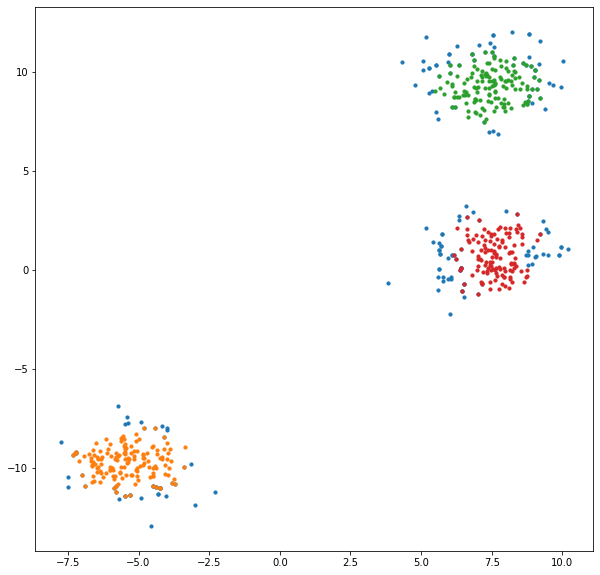

In [ ]:
plt.figure(figsize=(10,10))
for clust in np.unique(cluster):
    plt.scatter(X[cluster_df["idx"][cluster_df["cluster"] == clust].values, 0], X[cluster_df["idx"][cluster_df["cluster"] == clust].values, 1], s=10, label=f"Cluster{clust}")